In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sms
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

In [2]:
df = pd.read_csv('AirPassengers.csv')

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.isna().sum()

Month          0
#Passengers    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
df['Month'] = pd.to_datetime(df['Month'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [8]:
df.set_index('Month', inplace= True)

<Axes: xlabel='Month'>

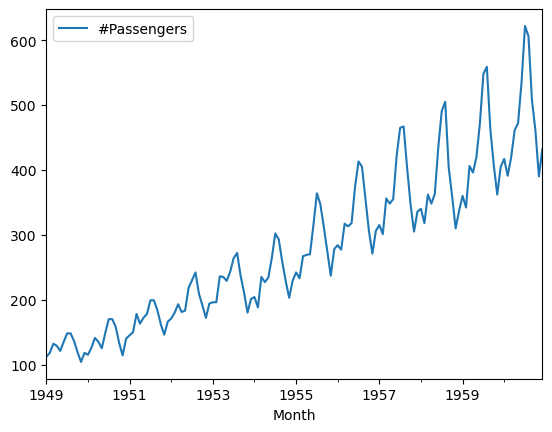

In [9]:
df.plot()

In [10]:
def test_series(series):
  result = adfuller(series)
  print('ADF-STATISTICS', result[0])
  print('P VALUE ', result[1])

  if result[1] <= 0.05:
    print('STRONG EVIDENCE AGAINST THE NULL HYPOTHESIS, THE DATA IS STATIONARY')
  else:
    print('WEAK EVIDENCE AGAINST THE NULL HYPOTHESIS, THE DATA IS NON-STATIONARY')





In [11]:
test_series(df['#Passengers'])

ADF-STATISTICS 0.8153688792060587
P VALUE  0.9918802434376411
WEAK EVIDENCE AGAINST THE NULL HYPOTHESIS, THE DATA IS NON-STATIONARY


In [12]:
df['FIRST DIFFERENCE'] = df['#Passengers'] - df['#Passengers'].shift(1)

In [13]:
df.head()

,#Passengers,FIRST DIFFERENCE
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


<Axes: xlabel='Month'>

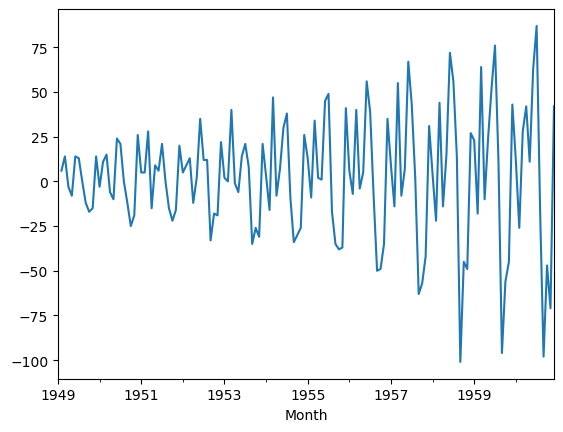

In [14]:
df['FIRST DIFFERENCE'].plot()

In [15]:
df.dropna(inplace= True)

In [16]:
test_series(df['FIRST DIFFERENCE'])

ADF-STATISTICS -2.8292668241699848
P VALUE  0.054213290283827514
WEAK EVIDENCE AGAINST THE NULL HYPOTHESIS, THE DATA IS NON-STATIONARY


In [17]:
df['SECOND DIFFERENCE'] = df['FIRST DIFFERENCE'] - df['FIRST DIFFERENCE'].shift(1)

In [18]:
df.head()

,#Passengers,FIRST DIFFERENCE,SECOND DIFFERENCE
Month,,,
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0
1949-06-01,135,14.0,22.0


In [19]:
df.dropna(inplace= True)

<Axes: xlabel='Month'>

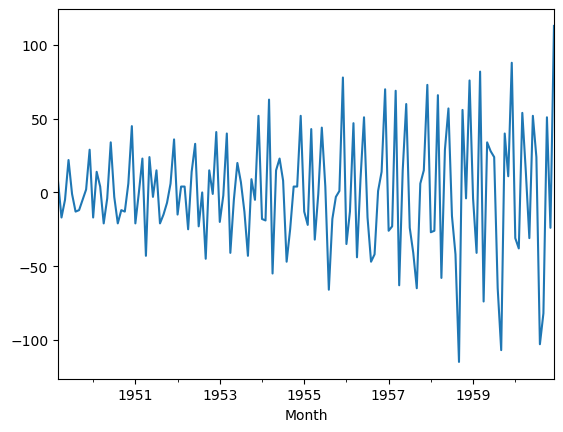

In [20]:
df['SECOND DIFFERENCE'].plot()

In [21]:
test_series(df['SECOND DIFFERENCE'])

ADF-STATISTICS -16.38423154246848
P VALUE  2.732891850014359e-29
STRONG EVIDENCE AGAINST THE NULL HYPOTHESIS, THE DATA IS STATIONARY


## ACF = P = AUTOREGRESSIVE
## PACF = Q = MOVING AVERAGE = ERROR TERM





In [22]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


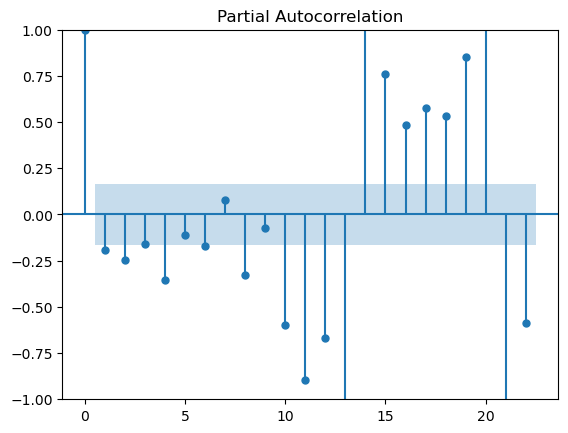

In [23]:
pacf = plot_pacf(df['SECOND DIFFERENCE'])

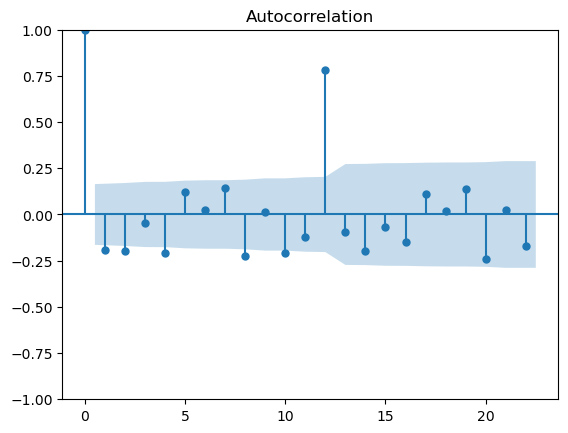

In [24]:
acf = plot_acf(df['SECOND DIFFERENCE'])

## Continue with splitting and training of a model

### p = 2
### q = 2
### d = 2

In [25]:
from datetime import datetime

In [26]:
train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [27]:
train_data = df[:train_dataset_end]

In [28]:
print(train_data)

            #Passengers  FIRST DIFFERENCE  SECOND DIFFERENCE
Month                                                       
1949-03-01          132              14.0                8.0
1949-04-01          129              -3.0              -17.0
1949-05-01          121              -8.0               -5.0
1949-06-01          135              14.0               22.0
1949-07-01          148              13.0               -1.0
...                 ...               ...                ...
1955-08-01          347             -17.0              -66.0
1955-09-01          312             -35.0              -18.0
1955-10-01          274             -38.0               -3.0
1955-11-01          237             -37.0                1.0
1955-12-01          278              41.0               78.0

[82 rows x 3 columns]


In [29]:
test_data = df[train_dataset_end:test_dataset_end]

In [30]:
print(test_data)

            #Passengers  FIRST DIFFERENCE  SECOND DIFFERENCE
Month                                                       
1955-12-01          278              41.0               78.0
1956-01-01          284               6.0              -35.0
1956-02-01          277              -7.0              -13.0
1956-03-01          317              40.0               47.0
1956-04-01          313              -4.0              -44.0
...                 ...               ...                ...
1960-08-01          606             -16.0             -103.0
1960-09-01          508             -98.0              -82.0
1960-10-01          461             -47.0               51.0
1960-11-01          390             -71.0              -24.0
1960-12-01          432              42.0              113.0

[61 rows x 3 columns]


In [31]:
from statsmodels.tsa.arima.model import ARIMA

In [32]:
model_arima = ARIMA(df['#Passengers'], order = (2,2,2))

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [33]:
my_model = model_arima.fit()

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [34]:
my_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  142
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -682.581
Date:                Sun, 20 Aug 2023   AIC                           1375.162
Time:                        10:12:08   BIC                           1389.870
Sample:                    03-01-1949   HQIC                          1381.139
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4634      0.124     -3.736      0.000      -0.707      -0.220
ar.L2          0.1070      0.113      0.944      0.345      -0.115       0.329
ma.L1         -0.1059     13.374     -0.008      0.994     -26.319      26.107
ma.L2         -0.8940     12.015     -0.074      0.941     -24.442      22.654
sigma2       971.4707    1.3e+04      0.074      0.941   -2.46e+04    2.65e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.44
Prob(Q):                              0.94   Prob(JB):                         0.29
Heteroskedasticity (H):               6.72   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## yt = a1yt-1 + a2yt-2 + a3yt-3

In [35]:
pred_start_date = test_data.index[0]

In [36]:
pred_end_date = test_data.index[-1]

In [37]:
pred_end_date

Timestamp('1960-12-01 00:00:00')

In [38]:
predict = my_model.predict(start = pred_start_date, end = pred_end_date)

In [39]:
print(predict)

1955-12-01    233.872235
1956-01-01    296.768212
1956-02-01    276.799301
1956-03-01    283.536674
1956-04-01    330.499215
                 ...    
1960-08-01    639.888671
1960-09-01    597.269375
1960-10-01    475.870758
1960-11-01    462.290919
1960-12-01    355.927216
Freq: MS, Name: predicted_mean, Length: 61, dtype: float64


In [40]:
test_data['PREDICTED ARIMA'] = predict

C:\Users\ilinz\AppData\Local\Temp\ipykernel_15068\3365571770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['PREDICTED ARIMA'] = predict


In [41]:
test_data

,#Passengers,FIRST DIFFERENCE,SECOND DIFFERENCE,PREDICTED ARIMA
Month,,,,
1955-12-01,278,41.0,78.0,233.872235
1956-01-01,284,6.0,-35.0,296.768212
1956-02-01,277,-7.0,-13.0,276.799301
1956-03-01,317,40.0,47.0,283.536674
1956-04-01,313,-4.0,-44.0,330.499215
...,...,...,...,...
1960-08-01,606,-16.0,-103.0,639.888671
1960-09-01,508,-98.0,-82.0,597.269375
1960-10-01,461,-47.0,51.0,475.870758
